In [1]:
#importing necessary libraries
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf

#importing mock data generation file
from datagen import *

#allowing gpu training
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

#specifying number of mock individuals to be generated
NUM_ROWS = 20000

In [2]:
#generating dataframe with data and splitting into independant and dependant variables
dframe = pd.DataFrame()
dframe = datagen(NUM_ROWS)
x = dframe.iloc[:, 1:-1].values
y = dframe.iloc[:, -1:].values

In [3]:
#sample of generated data
dframe

,studentIDs,gender,age,teacher_cred,class_size,disability,accomadation,gpadifference
0,19863,Female,6,Bachelor's,34,Dyslexia,Special Education Classroom,-0.680207
1,31919,Male,6,Bachelor's,28,Visual Disability,Materials in Braille,0.530560
2,35739,Female,11,Associate's,30,Low Emotional Intelligence,Isolated Workstation,0.381486
3,14945,Female,9,Bachelor's,25,Developmentally Delayed,Tutoring Sessions,1.053432
4,13967,Female,10,PhD,35,Mathematics Disability,Breakout Corner,0.200045
...,...,...,...,...,...,...,...,...
19995,19203,Female,9,Bachelor's,32,Speaking Disability,AAC Devices,1.021408
19996,17010,Female,18,Bachelor's,25,Developmentally Delayed,Text to Speech Devices,-1.030830
19997,22920,Male,12,Master's,32,Dyslexia,Text to Speech Devices,0.021213
19998,48422,Female,10,Master's,28,Developmentally Delayed,Use of Calculator on Tests,1.895414


In [ ]:
# make me graph of teach_cred and class_size

In [31]:
#replacing gender column with 0s and 1s for training
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 0] = le.fit_transform(x[:,0])
print(x)

[[0 7 'PhD' 36 'Mathematics Disability' 'AAC Devices']
 [0 15 'PhD' 31 'Auditory Disability' 'Text to Speech Devices']
 [0 9 "Bachelor's" 27 'Autism' 'Bigger Print Materials']
 ...
 [1 14 "Associate's" 33 'Developmentally Delayed' 'Materials in Braille']
 [1 13 "Master's" 31 'Visual Disability' 'Bigger Print Materials']
 [0 15 'PhD' 36 'Autism' 'Book Buddy']]


In [4]:
# show in our data the different accomidations we have
# the impact that on average has on the gpa
dframe.groupby("accomadation").count()["gpadifference"].reset_index()['accomadation'].values

array(['AAC Devices', 'Bigger Print Materials', 'Book Buddy',
       'Breakout Corner', 'Isolated Workstation', 'Materials in Braille',
       'Special Education Classroom', 'Text to Speech Devices',
       'Tutoring Sessions', 'Use of Calculator on Tests',
       'Use of Toy in Class'], dtype=object)

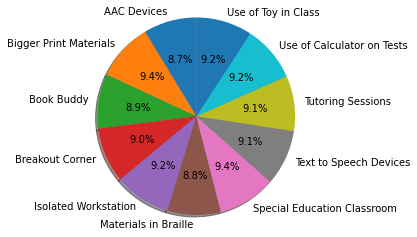

In [5]:
#TODO write the explode change colors so it looks nice
# clean up code
#shows prevalance of accomadations given by percentage. Purely random for now.
fig1, ax1 = plt.subplots()
ax1.pie(dframe.groupby("accomadation").count()["gpadifference"].reset_index()['gpadifference'].values, 
        labels=dframe.groupby("accomadation").count()["gpadifference"].reset_index()['accomadation'].values,
        autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

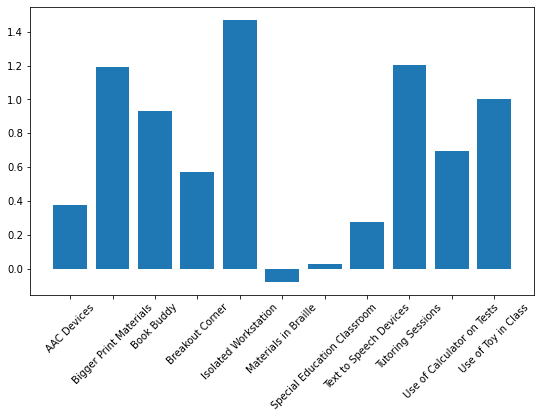

In [6]:
# select all ADHD
# group by accomidation
# the mean gpa difference
# aggregate functions
#TODO 
# title and we need to label our axes
# choose an impactful color
# This shows which accomadations have what average effect on students with ADHD.
# We can see that having an isolated workstation has the greatest positive impact on these students.
dframe.query("disability == 'ADHD'").groupby("accomadation").mean().reset_index()
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=45)
ax.bar(dframe.query("disability == 'ADHD'").groupby("accomadation")
       .mean().reset_index()['accomadation'].values,
       dframe.query("disability == 'ADHD'").groupby("accomadation")
       .mean().reset_index()['gpadifference'].values)
plt.show()


['AAC Devices' 'Bigger Print Materials' 'Book Buddy' 'Breakout Corner'
 'Isolated Workstation' 'Materials in Braille'
 'Special Education Classroom' 'Text to Speech Devices'
 'Tutoring Sessions' 'Use of Calculator on Tests' 'Use of Toy in Class']
object


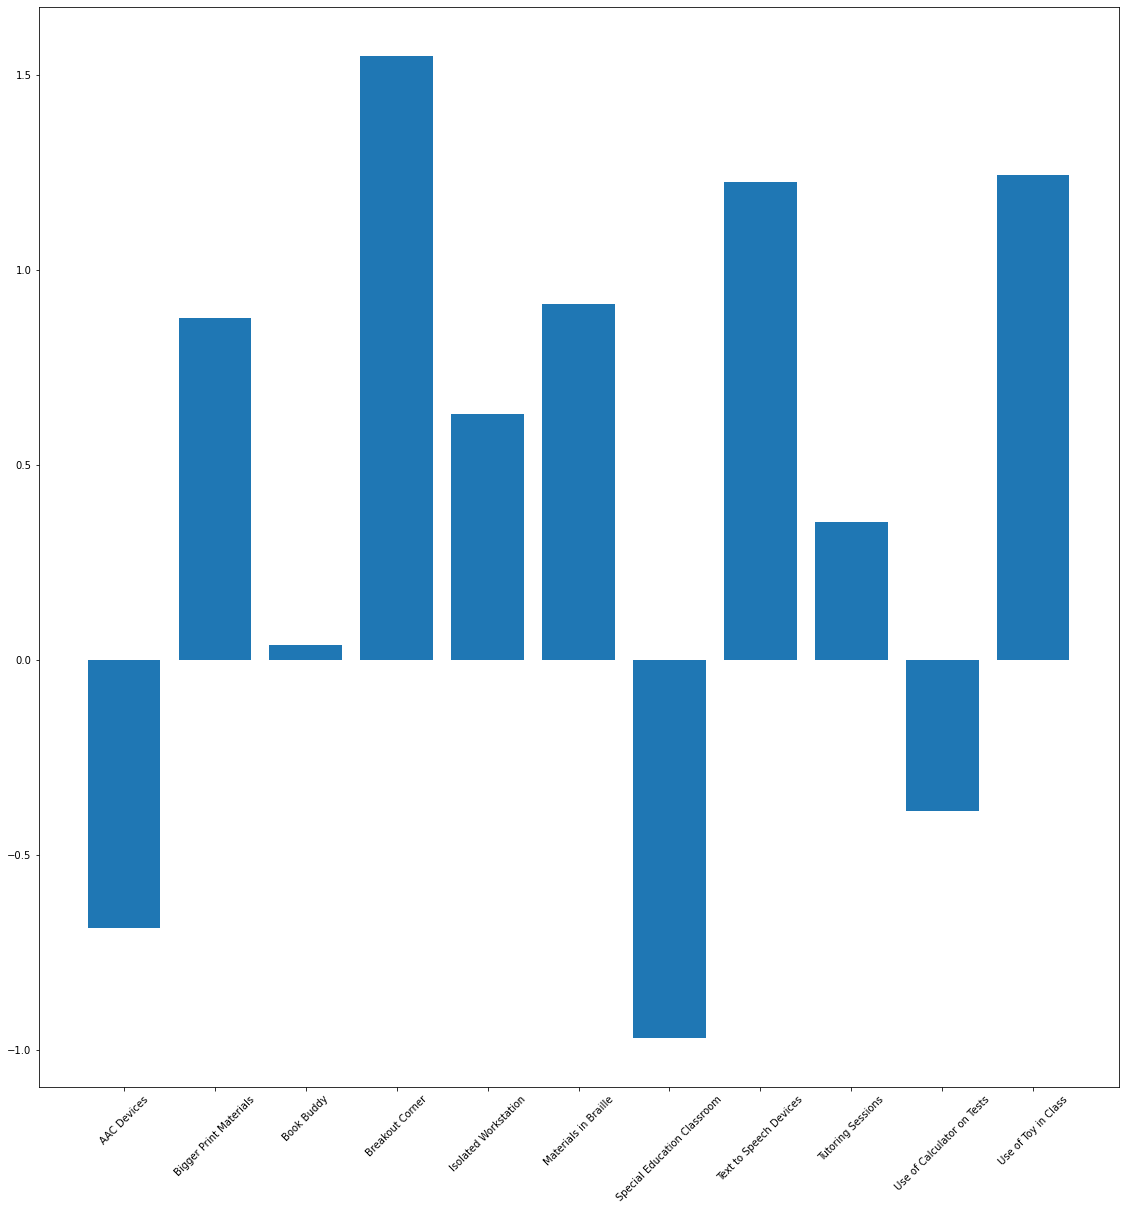

In [7]:
#This graph shows the same average benefit of accomadations for students with autism.
dframe.query("disability == 'Autism'").groupby("accomadation").mean().reset_index()
fig = plt.figure(figsize=(15,15))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=45)
ax.bar(dframe.query("disability == 'Autism'").groupby("accomadation").mean().reset_index()['accomadation'].values,dframe.query("disability == 'Autism'").groupby("accomadation").mean().reset_index()['gpadifference'].values)
print(dframe.query("disability == 'Autism'").groupby("accomadation").mean().reset_index()['accomadation'].values)
print(dframe.query("disability == 'Autism'").groupby("accomadation").mean().reset_index()['accomadation'].values.dtype)
plt.show()

<AxesSubplot:xlabel='accomadation,teacher_cred'>

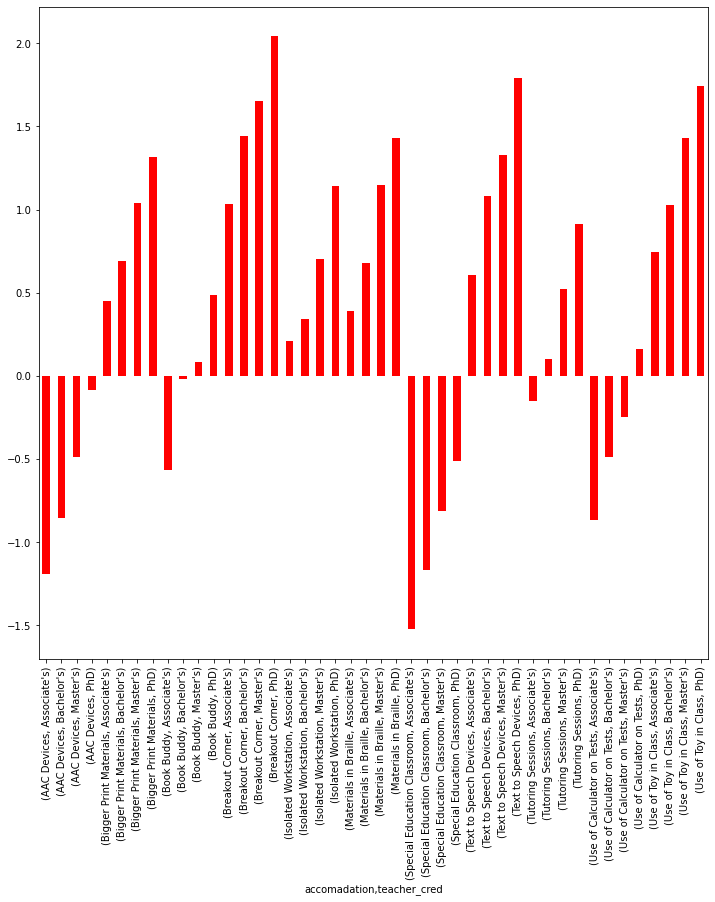

In [8]:
# when looking at students with autism and accomadation, teacher_cred has a positive impact
# This relationship is easy to see after some maniuplation of the data.
# However, real life data will not be so easy to parse
# Using machine learning we can easily find more complicatied relationships
dframe.query("disability == 'Autism'").groupby(["accomadation", 'teacher_cred']).mean()['gpadifference'].plot.bar(figsize=(12,12), color = 'red')


<AxesSubplot:xlabel='teacher_cred'>

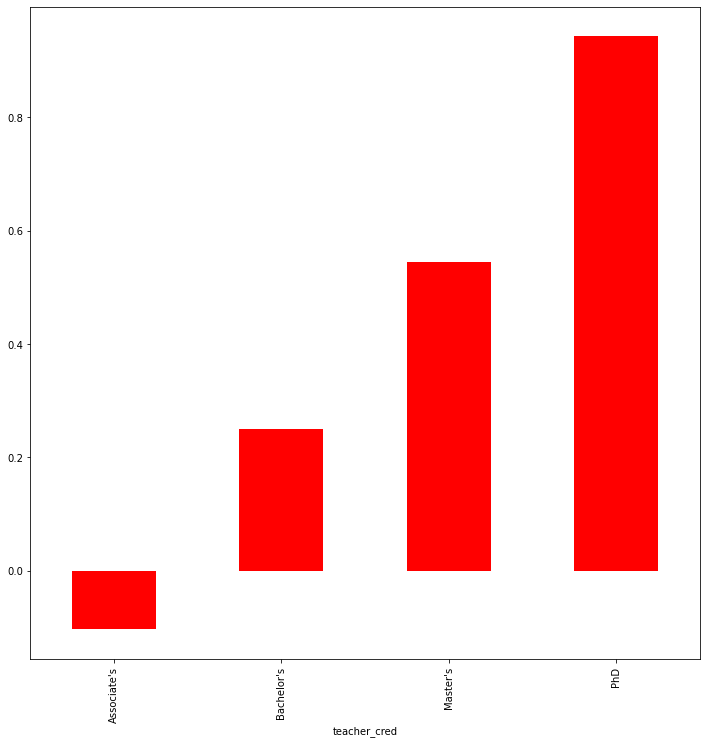

In [9]:
dframe.query("disability == 'Autism'").groupby(['teacher_cred']).mean()['gpadifference'].plot.bar(figsize=(12,12), color = 'red')


In [32]:
#replacing all categorical variables with binary yes/no columns for training
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#replacing teacher_cred with 4 binary columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
#replacing 'disability' column with 10 binary columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
#replacing accomadation given with 10 binary columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [18])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

print(x)

[0.0 0.0 0.0 1.0 0 7 36 'Mathematics Disability' 'AAC Devices']
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0 7 36
 'AAC Devices']


In [33]:
x

array([[1.0, 0.0, 0.0, ..., 0, 7, 36],
       [0.0, 0.0, 0.0, ..., 0, 15, 31],
       [0.0, 1.0, 0.0, ..., 0, 9, 27],
       ...,
       [0.0, 0.0, 0.0, ..., 1, 14, 33],
       [0.0, 1.0, 0.0, ..., 1, 13, 31],
       [0.0, 0.0, 1.0, ..., 0, 15, 36]], dtype=object)

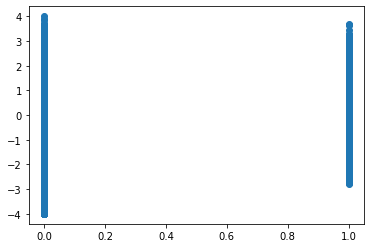

In [34]:
plt.scatter(x[:,], y)
#looking at gender, there is a mild aptitude for female gender to have a higher GPA

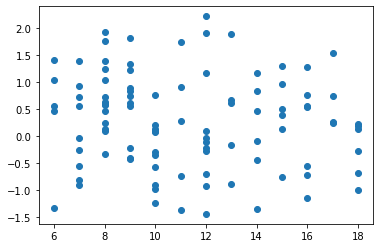

In [8]:
plt.scatter(x[:100, 5], y[:100])
#age versus gpa difference. No pattern is immediately obvious,
#but a deeper relationship becomes is present when also looking at gender

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='class_size', ylabel='age'>,
        <AxesSubplot:xlabel='gpadifference', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='class_size'>,
        <AxesSubplot:xlabel='class_size', ylabel='class_size'>,
        <AxesSubplot:xlabel='gpadifference', ylabel='class_size'>],
       [<AxesSubplot:xlabel='age', ylabel='gpadifference'>,
        <AxesSubplot:xlabel='class_size', ylabel='gpadifference'>,
        <AxesSubplot:xlabel='gpadifference', ylabel='gpadifference'>]],
      dtype=object)

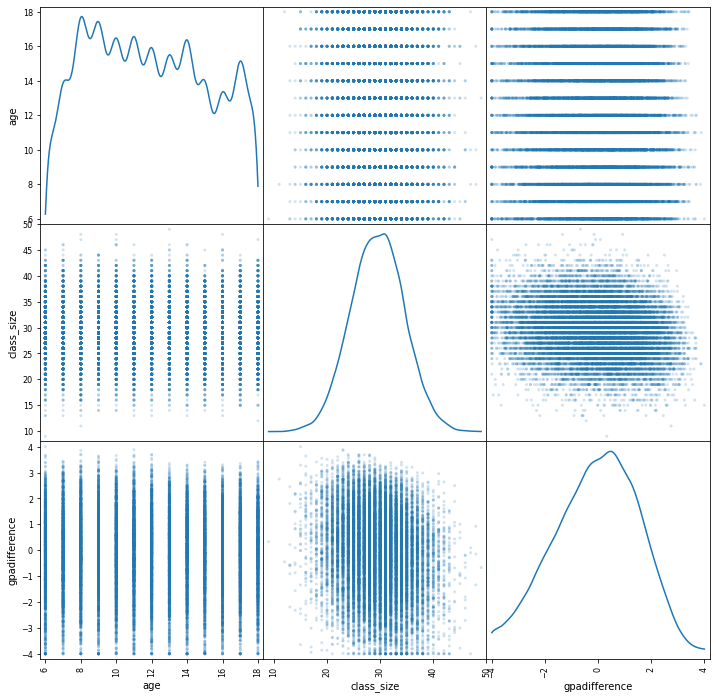

In [81]:
#multi-graph display of all data
from pandas.plotting import scatter_matrix
scatter_matrix(dframe.iloc[:, 1:], alpha=0.2, figsize=(12, 12), diagonal='kde')

In [82]:
#setting up 10-D graph of all availiable data, not just numerical
bob = pd.DataFrame(np.concatenate((x,y), axis=1))

In [38]:
bob[0] = bob[0].astype(int)
bob[1] = bob[1].astype(int)
bob[2] = bob[2].astype(int)
bob[3] = bob[3].astype(int)
bob[4] = bob[4].astype(int)
bob[5] = bob[5].astype(int)
bob[6] = bob[6].astype(int)
bob[7] = bob[7].astype(float)

In [39]:
bob = bob.rename(columns={0:'associate', 1:'bachelor', 2:'master', 3:'phd', 4:'gender', 5:'age', 6:'class_size', 7:'gpa'})

In [40]:
bob.dtypes

associate       int32
bachelor        int32
master          int32
phd             int32
gender          int32
age             int32
class_size      int32
gpa           float64
dtype: object

array([[<AxesSubplot:xlabel='associate', ylabel='associate'>,
        <AxesSubplot:xlabel='bachelor', ylabel='associate'>,
        <AxesSubplot:xlabel='master', ylabel='associate'>,
        <AxesSubplot:xlabel='phd', ylabel='associate'>,
        <AxesSubplot:xlabel='gender', ylabel='associate'>,
        <AxesSubplot:xlabel='age', ylabel='associate'>,
        <AxesSubplot:xlabel='class_size', ylabel='associate'>,
        <AxesSubplot:xlabel='gpa', ylabel='associate'>],
       [<AxesSubplot:xlabel='associate', ylabel='bachelor'>,
        <AxesSubplot:xlabel='bachelor', ylabel='bachelor'>,
        <AxesSubplot:xlabel='master', ylabel='bachelor'>,
        <AxesSubplot:xlabel='phd', ylabel='bachelor'>,
        <AxesSubplot:xlabel='gender', ylabel='bachelor'>,
        <AxesSubplot:xlabel='age', ylabel='bachelor'>,
        <AxesSubplot:xlabel='class_size', ylabel='bachelor'>,
        <AxesSubplot:xlabel='gpa', ylabel='bachelor'>],
       [<AxesSubplot:xlabel='associate', ylabel='master'>,
   

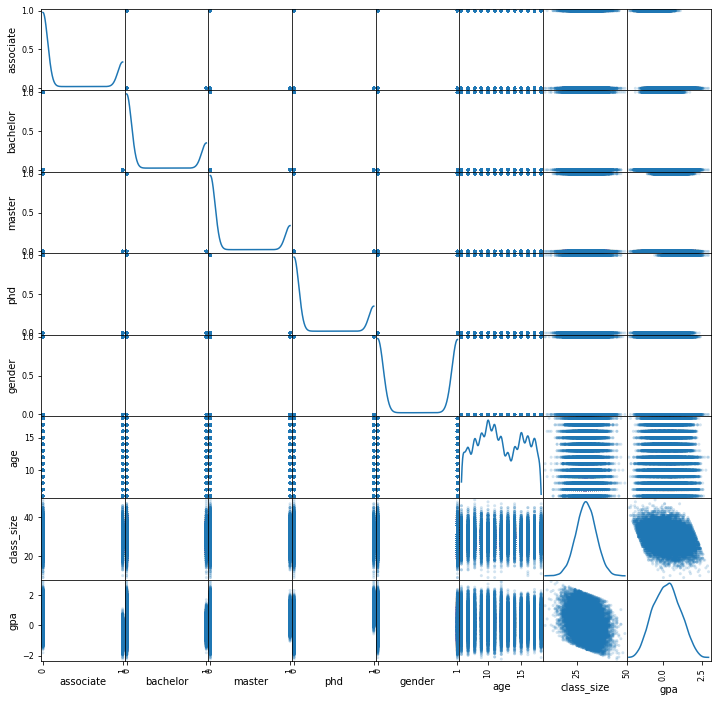

In [42]:
#10D graph of relationships with all data. This does not include accomodations given or disability,
#otherwise the graph would be prohibitively large. (30D)
scatter_matrix(bob.iloc[:, :], alpha=0.2, figsize=(12, 12), diagonal='kde')

In [ ]:
# add type of disablity and type of accomadation columns
# code k-means
# get stonks with keras